# Fundamentals of Social Data Science 
## Week 2 Day 2 Lab: Downloading to Wikipedia

Today we will review some changes to the Wikipedia code. These changes will considerably alter what you are able to do with this code. The end result will be a set of two folders, `data` and `dataframes` which you can use for analysis of Wikipedia. 

The code has now been altered on my end in several ways: 
- use and report curl from special export to get a complete history of a page. 
- considerably expanded reporting and commenting.
- new arguments available to the script include --count_only 

There is also now a second script available `xml_to_dataframe.py` which can be used to then process these files and turn them into separate DataFrames. These DataFrames are stored as .feather files and can be loaded with the code below. 

You should review the `xml_to_dataframe.py` file as all the operations within that file have been covered in class with the exception of TQDM but you can see how that works in practice. 

You will note that this version does not use recursion to count the files. Instead it more literally looks within year and month. This is sufficient for this work, but with a deeper folder structure and one where the structure is less certain this approach would not be robust. On the other hand, by assuming year and month it allows for some interesting statistics about the year and month to be displayed. In your own work you may now consider whether to approach a task with a more general but often more abstract solution or a more specific but often more fragile solution. You can see in Jon's solution that he used a clever way to simply count all the files using a global and letting the global handle the recursion (`download_and_count_revisions_solution.py`).

You should now be able to download a complete history for a single wikipedia page and process that as a DataFrame. Confirm that you can do this with the code yourself. Then discuss among your group:
1. Which two (or more) public figures are worth comparing and why. 
2. Prior to any specific time series analysis, consider your expectations for this exploratory comparison.  

Draw upon your group's potential expertise in social science to come up with a theoretically informed rationale for a given comparison. 

## Merging in Changes to a Repository 

First you will want to merge files from an upstream branch (mine). These instructions will show how to do that from the terminal. You will want to be in the oii-fsds-wikipedia folder when entering these commands. Note especially **Step 3**. If you do this it will overwrite `download_wiki_revisions.py` so consider making a backup. 

1. **Add the original repository as a remote:**
   ```sh
   git remote add upstream https://github.com/berniehogan/oii-fsds-wikipedia.git
   ```

2. **Fetch the changes from the original repository:**
   ```sh
   git fetch upstream
   ```

3. **Backup any local changes:**
   If you have your own versions of files like `download_wiki_revisions.py`, you should rename the file first to avoid conflicts:
   ```sh
   mv download_wiki_revisions.py download_wiki_revisions_backup.py
   ```

4. **Merge upstream changes into your local main branch:**
   ```sh
   git merge upstream/main
   ```

5. **Resolve any conflicts and commit the changes:**
   You should resolve any conflicts that arise during the merge and then commit the changes:
   ```sh
   git add .
   git commit -m "Merge changes from upstream"
   ```

6. **Push the changes to your GitHub repository:**
   ```sh
   git push origin main
   ```

7. **Test your code after merging:**
   You should test your code to ensure everything works correctly after the integration.

By following these steps, you should be able to integrate the latest changes from my repository while preserving your own custom modifications.

Once this is done, you can use the script below if you wish in order to run the commands directly within a Jupyter notebook rather than via that terminal. 

In [3]:
import os
import pandas as pd

# # Define articles we want to download
# article1 = "Liz_Truss"
# article2 = "Liz_Truss_lettuce"

# # Create necessary directories if they don't exist
# os.makedirs("data", exist_ok=True)
# os.makedirs("DataFrames", exist_ok=True)

# # Download revisions for both articles
# print("Downloading revisions for first article...")
# os.system(f'python download_wiki_revisions.py "{article1}"')
# print("\nDownloading revisions for second article...")
# os.system(f'python download_wiki_revisions.py "{article2}"')

# # Convert all downloaded revisions to DataFrames
# print("\nConverting revisions to DataFrames...")
# os.system('python xml_to_dataframe.py --data-dir ./data --output-dir ./DataFrames')

# # Load and verify one of the DataFrames
# print("\nVerifying DataFrame contents...")
# df = pd.read_feather(f"DataFrames/{article1}.feather")

# # Display basic information about the DataFrame
# print("\nDataFrame Info:")
# print(df.info())

# print("\nFirst few rows:")
# print(df.head())

# # Display some basic statistics
# print("\nBasic statistics:")
# print(f"Total number of revisions: {len(df)}")
# print(f"Date range: from {df['timestamp'].min()} to {df['timestamp'].max()}")
# print(f"Number of unique editors: {df['username'].nunique()}")

In [4]:
df

NameError: name 'df' is not defined

In [5]:
liz = pd.read_feather("DataFrames/Liz_Truss.feather")

In [6]:
lettuce = pd.read_feather("DataFrames/Liz_Truss_lettuce.feather")

In [7]:
len(liz)

4507

In [8]:
len(lettuce)

351

In [9]:
liz.head()

,revision_id,timestamp,username,userid,comment,text_length,year,month
2522,1253353646,2024-10-25 14:54:55+00:00,Rfl0216,27738727,/* News */,160213,2024,10
2508,1253353474,2024-10-25 14:53:59+00:00,Rfl0216,27738727,/* News */,160221,2024,10
2512,1252555617,2024-10-21 21:44:52+00:00,Tim O'Doherty,42923857,Undo,160229,2024,10
2507,1252459885,2024-10-21 13:09:08+00:00,Wabbuh,48227547,None,160251,2024,10
2511,1252007563,2024-10-19 08:12:14+00:00,UndercoverClassicist,44786610,cosmetic lint-y change (template to plaintext ...,160229,2024,10


In [10]:
liz_daily = liz.groupby(liz['timestamp'].dt.date).size()

In [11]:
import matplotlib.pyplot as plt

<Axes: xlabel='timestamp'>

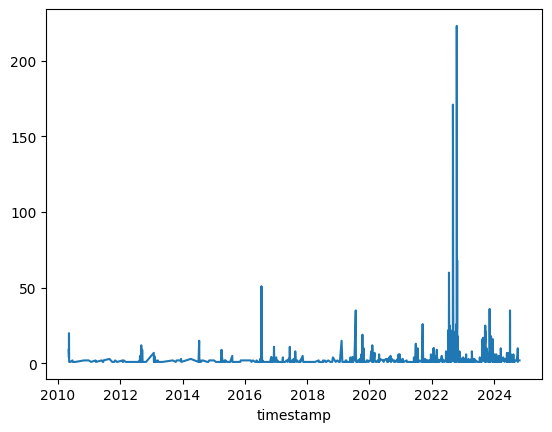

In [12]:
# Plot liz_daily as a scatter
liz_daily.plot()